# 1. Data Preparation:

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r'/Users/saninzulphi/Downloads/dataLAB5'

In [2]:
target_size = (224, 224) 
batch_size = 32 

rotation_range = 40  
width_shift_range = 0.2  
height_shift_range = 0.2  
shear_range = 0.2  
zoom_range = 0.2 
horizontal_flip = True  
brightness_range = [0.8,1.2]  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    brightness_range=brightness_range,
    validation_split=0.2  
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# CNN Architecture

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential()

# Convolutional layer 1 with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with Batch Normalization
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with Batch Normalization
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(4, activation='softmax'))

model.summary()


/Users/saninzulphi/Library/Python/3.11/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,478,980 (196.38 MB)

 Trainable params: 51,477,508 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

# combile the model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training the Model

In [5]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10, 
    callbacks=[tensorboard_callback]
)


Epoch 1/10


/Users/saninzulphi/Library/Python/3.11/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.4891 - loss: 1.4510 - val_accuracy: 0.2488 - val_loss: 1.5103
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5915 - loss: 0.9762 - val_accuracy: 0.2700 - val_loss: 1.5283
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6268 - loss: 0.8671 - val_accuracy: 0.2637 - val_loss: 1.8488
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6456 - loss: 0.8464 - val_accuracy: 0.3638 - val_loss: 1.9313
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6678 - loss: 0.7952 - val_accuracy: 0.6175 - val_loss: 0.9018
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6475 - loss: 0.8049 - val_accuracy: 0.6212 - val_loss: 0.9341
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7052 - loss: 0.7111 - val_accuracy: 0.5938 - val_loss: 0.9907
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6839 - loss: 0.7357 - val_accuracy: 0.638

# Visualizations

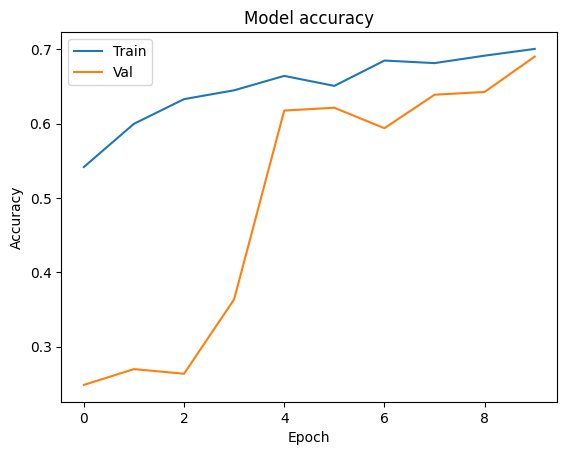

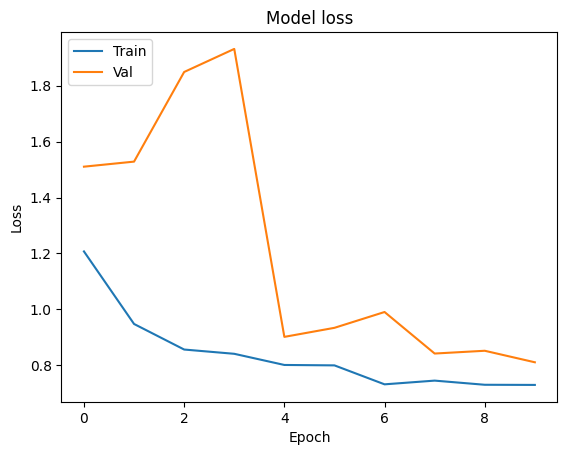

In [6]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step


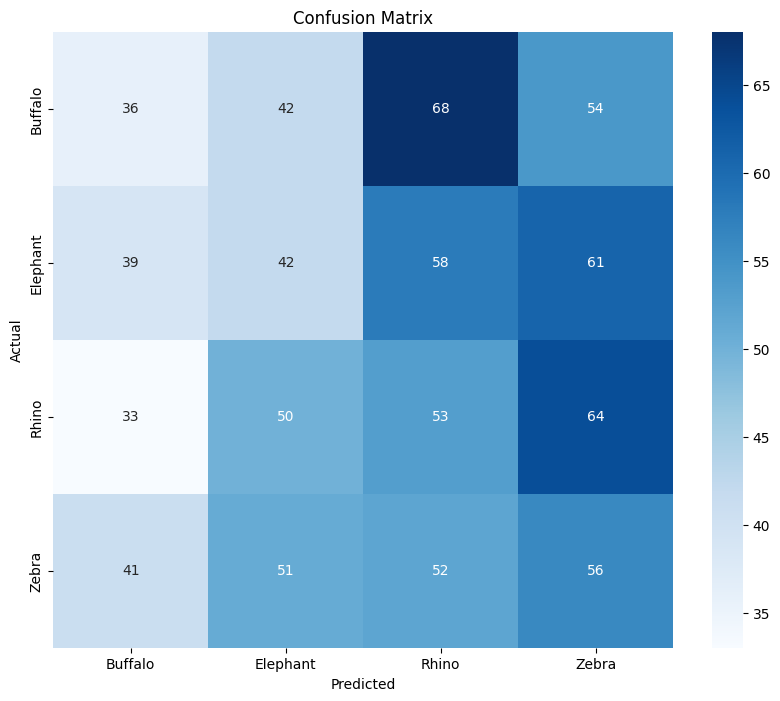

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

validation_generator.reset()  
predictions = model.predict(validation_generator, steps=len(validation_generator))
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Class Activation Maps
Class Activation Maps (CAMs) show the regions of the image that were most influential in making a classification decision. Implementing CAMs from scratch can be complex, but you can achieve a similar effect with Grad-CAM, which uses the gradients of any target concept (like output class) flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.